In [ ]:
HTML_MODE = True
if not HTML_MODE:
    %matplotlib widget
else:
    %matplotlib inline

### 週販レポート
# 標準ライブラリ
import os
from datetime import datetime, timedelta

# サードパーティライブラリ
import pandas as pd
from pandas import Timedelta
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from IPython.display import Markdown, display

# プロジェクト内モジュール
from gamedata import hard_sales as hs
from gamedata import plot_hard as ph
from gamedata import hard_info as hi
from gamedata import hard_event as he
from gamedata import chart_hard as ch
from gamedata import util as gu

# レポート日付
from report_config import get_config

config = get_config()
report_date = config["date"]
report_event_mask = he.EventMasks(hard=1.5, price=3, sale=2, soft=1.5, event=1)

def show_title(d:datetime) -> None:
    last_updated_str = d.strftime("%Y-%m-%d")
    mode = "[[LAB MODE]]" if not HTML_MODE else ""
    display(Markdown(f"# 国内ゲームハード週販レポート ({last_updated_str}) {mode}"))

show_title(report_date)

if not HTML_MODE:
    plt.show()
    
    

# 国内ゲームハード週販レポート (2025-11-30) 

* ハードウェアの販売データはファミ通の調査結果を基にしています。
* 一部のデータは処理上の都合により、週次値に調整しています。
* [過去の週販レポート](index.html)

## 直近4週間のハード売り上げ／累計推移

Switch2の販売台数は先週の12万台から減少の9万7千台。
先週多かったのはエアライダー合わせの出荷だったようです。
通常週だと今後も10万台/週の推移になるのでしょうか。
次回集計はメトロイドプライム4週ですが、日本での出荷増は...あるといいですねぇ。

Switchはメーカー側のセールは特にないですが、店舗側のブラックフライデー影響でしょうか、
伸びてます。

PS5は先週と同水準の3万5千台。DE日本語版は23381台 → 17491台と減少するも、
Proが11367台→15736台と増加。
今週はブラックフライデーセール(12/1迄)効果が強く出ている週です。
セールは12/1までなので、次回集計も期待できます。

In [19]:
df1 = hs.load_hard_sales()
(out1, style1) = ch.chart_units_by_date_hw(df1, begin=gu.weeks_before(report_date, 3), end=report_date)
display(style1)

In [2]:
df = hs.load_hard_sales()
df = hs.pivot_yearly_sales(df, begin=datetime(2020,1,1), hw=['PS4', 'PS5'])
df['PS合計'] = df.sum(axis=1)
# index値が2020のPS合計カラムと index値が2025のPS合計カラムの差を計算
sum2020 = df.loc[2020, 'PS合計']
sum2025 = df.loc[2025, 'PS合計']
diff = sum2020 - sum2025 + 1
display(Markdown(f"### 現時点の年間PS販売台数 {sum2025:,}台、2020年の記録{sum2020:,}台を超えるまで、あと{diff:,}台"))

### 現時点の年間PS販売台数 797,540台、2020年の記録797,797台を超えるまで、あと258台

## 週販推移

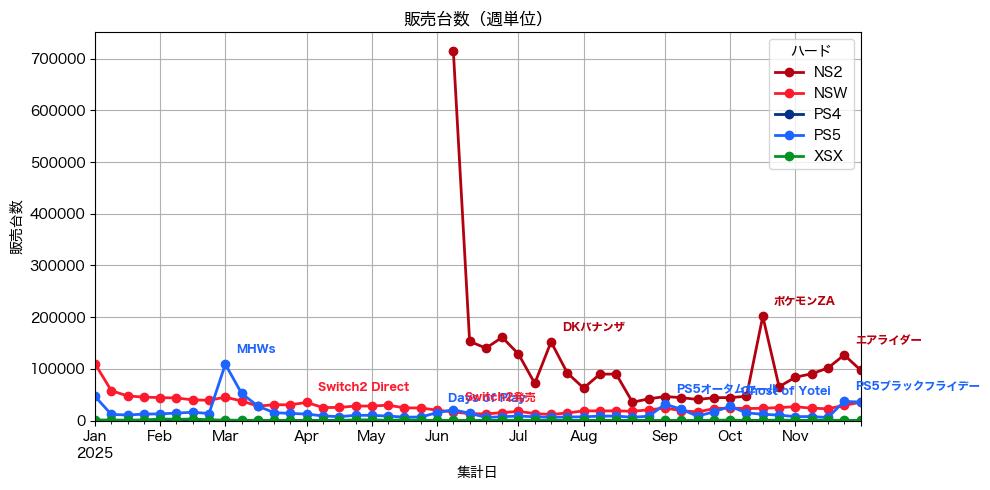

In [30]:
(fig, df) = ph.plot_sales(begin=gu.report_begin(report_date), end=report_date, event_mask=report_event_mask)

### 週販推移(拡大）

Switch2の販売数はここに来ても振れ幅が大きいので、今後の推移を考えるのは無理なのですが、
15万/週は難しそうな気はしますね。

PS5はSwitchと地味目の接戦です。


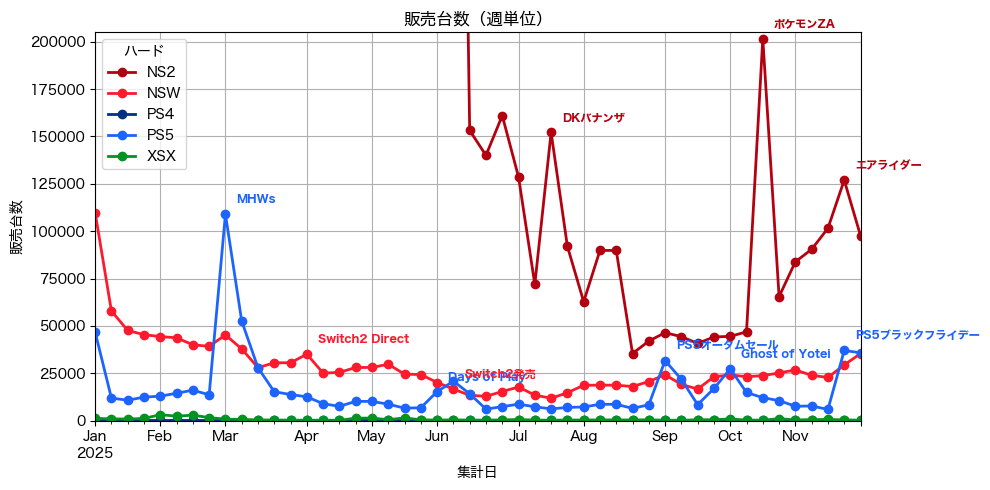

In [31]:
(fig, df) = ph.plot_sales(begin=gu.report_begin(report_date), end=report_date, ymax=205000, event_mask=report_event_mask)

## 月間販売推移

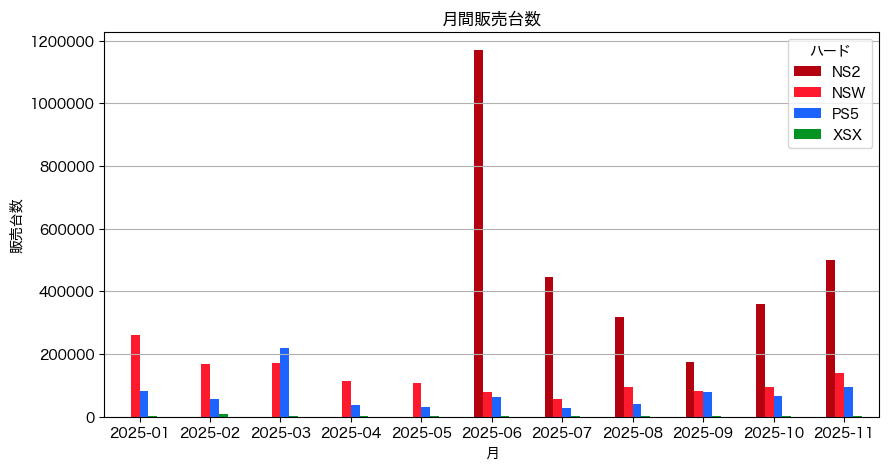

In [32]:
(fig, df) = ph.plot_monthly_bar_by_hard(hw=["NS2", "PS5", "NSW", "XSX"], 
                                        begin=gu.report_begin(report_date), end=report_date,
                                        stacked=False)

Switch2の11月販売台数が50万台を超え、ロンチの6月に次ぐ2番目の販売月となりました。
PS5は値下げ&セール効果で追い上げましたが、Switchの11月販売には届きませんでした。

In [33]:
df = df.style.format({'NS2': '{:,.0f}', 'NSW': '{:,.0f}', 'PS5': '{:,.0f}', 'XSX': '{:,.0f}'})
display(df)

hw,NS2,NSW,PS5,XSX
year_month,,,,
2025-01,0,"260,447","81,587","3,861"
2025-02,0,"167,188","56,886","9,751"
2025-03,0,"171,921","218,300","2,081"
2025-04,0,"113,513","38,983","1,710"
2025-05,0,"106,506","32,001","3,467"
2025-06,"1,169,684","78,097","63,516","1,400"
2025-07,"444,706","57,532","28,959","1,197"
2025-08,"319,690","94,517","39,004","1,599"
2025-09,"175,542","82,946","78,693","1,121"


### Nintendo Switchの月間販売台数： 2023,2024年との比較

Switchの2025年11月の前年度比は54%でした。10月が39%でしたので、
なんと改善しています。Switch需要はまだまだ根強そうですが、
昨今のLPDDR4Xの価格上昇が気になります。


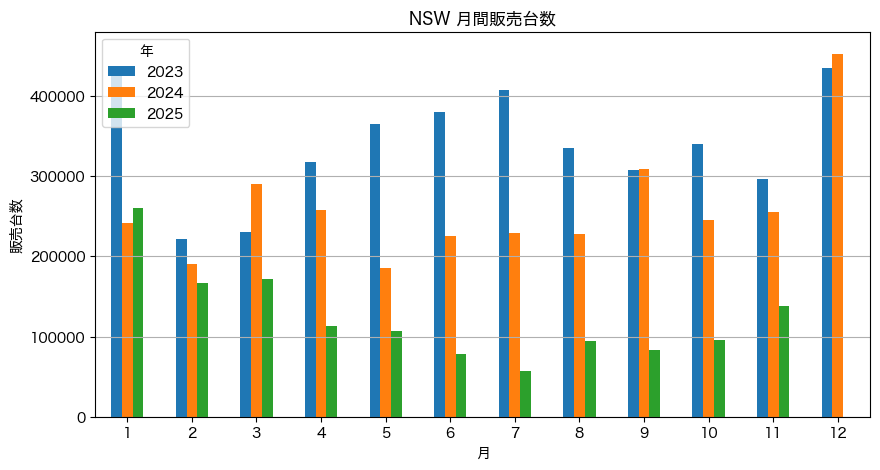

In [34]:
(fig, df) = ph.plot_monthly_bar_by_year(hw="NSW", ymax=480000, begin=gu.years_ago(report_date), end=report_date)

### PlayStation 5の月間販売台数： 2023, 2024年との比較

11月のPS5は93852台で10万台にはギリ届きませんでした。
値下げとセールで対策しました結果、11月の前年比は62%になりました。
前年比7割程度と予想しましたが高すぎましたね。

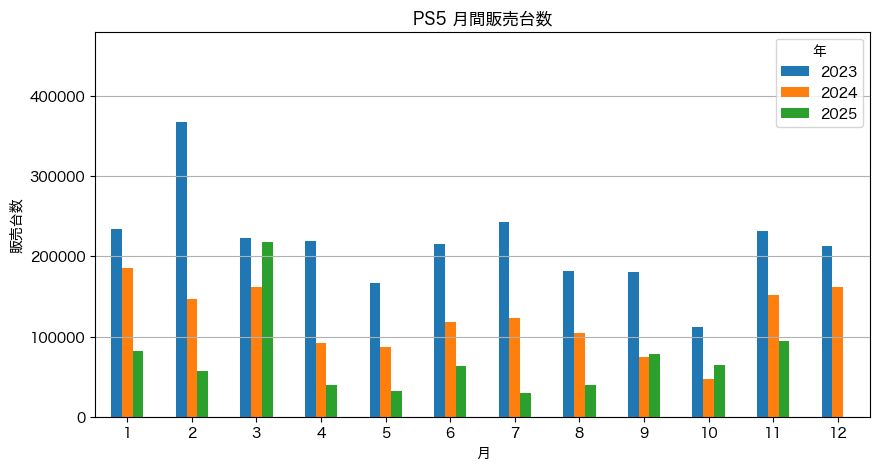

In [35]:
(fig, df) = ph.plot_monthly_bar_by_year(hw="PS5", ymax=480000, begin=gu.years_ago(report_date), end=report_date)

## 累計販売推移



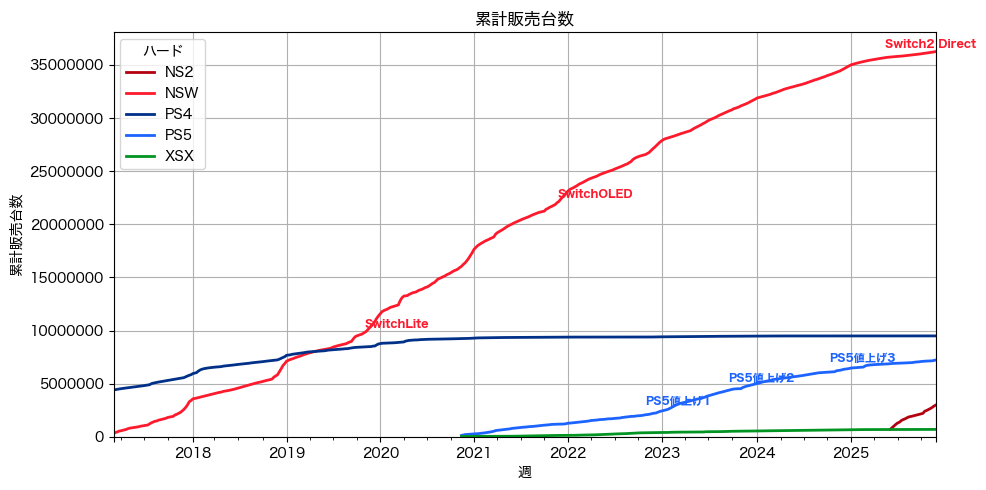

In [36]:
long_range_event_mask = he.EventMasks(hard=0.5, soft=0, event=0, price=0, sale=0)
(fig, df) = ph.plot_cumulative_sales(hw=['PS4', 'NS2', 'PS5', 'NSW', 'XSX'], begin=datetime(2017,3,1), event_mask = long_range_event_mask)


In [22]:
# df

## Switch2初動状況

Switch2の累計は296万台に到達。来週には300万台到達です。
順調ですが、出荷ペースが10万/週で程度なら、年内のGBAキャッチアップは難しそうです。

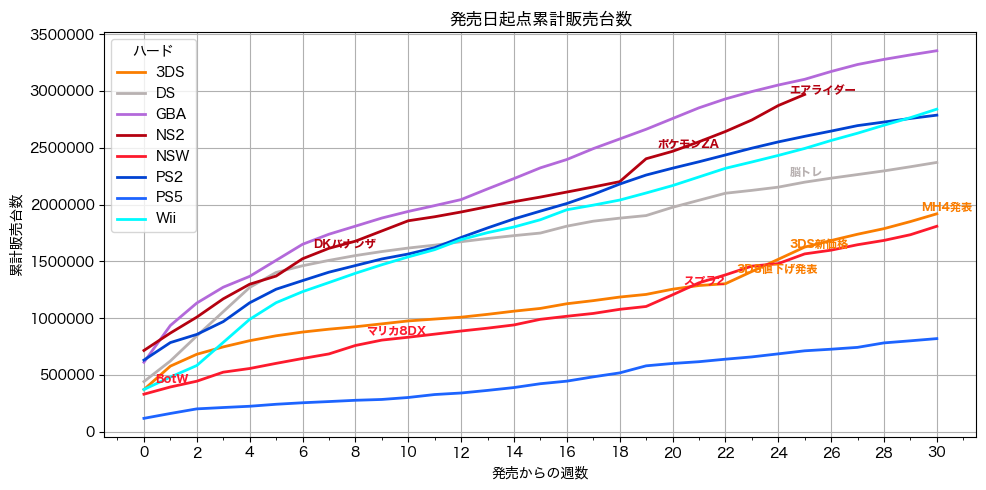

In [37]:
(fig, df) = ph.plot_cumulative_sales_by_delta(hw=["GBA", "NS2", "DS", "PS2", "Wii", "3DS", "NSW", "PS5"], 
                                        mode="week", xgrid=2, end=30,
                                        event_mask=report_event_mask)

In [38]:
df12 = df.iloc[df.index == 25]
# df12をunpivotして、列名を"ハード"、"販売数"にする
df12_unpivot = df12.unstack().reset_index()
df12_unpivot.columns = ['ハード', '週数', '販売数']
df12_unpivot.sort_values(by='販売数', ascending=False, inplace=True)
df12_unpivot.set_index('ハード', inplace=True)
display(df12_unpivot.style.format({'販売数': '{:,.0f}'}))

,週数,販売数
ハード,,
GBA,25,"3,101,731"
NS2,25,"2,968,435"
PS2,25,"2,599,766"
Wii,25,"2,493,149"
DS,25,"2,196,573"
3DS,25,"1,625,087"
NSW,25,"1,565,273"
PS5,25,"712,418"


## 年単位の状況

2025年の販売台数が516万台となり500万台を突破しました。


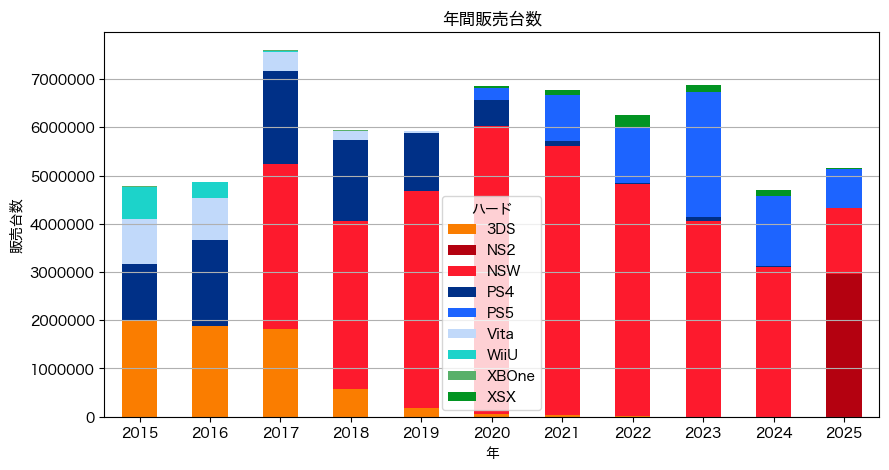

In [39]:
(fig, df) = ph.plot_yearly_bar_by_hard(hw=['PS4', 'PS5', 'NSW', 'NS2', '3DS', 'WiiU', 'Vita', 'XSX', 'XBOne'], 
                                       begin=gu.years_ago(report_date, 10),
                                       end=report_date, stacked=True)

In [40]:
# df["sum"] = df.sum(axis=1)
# df

### 年単位のメーカーシェア

2025年 年末商戦でさらなる任天堂シェア上昇が予想されますが、PS5 DE値下げとブラックフライデーセールの効果でどこまで抑えられるか。

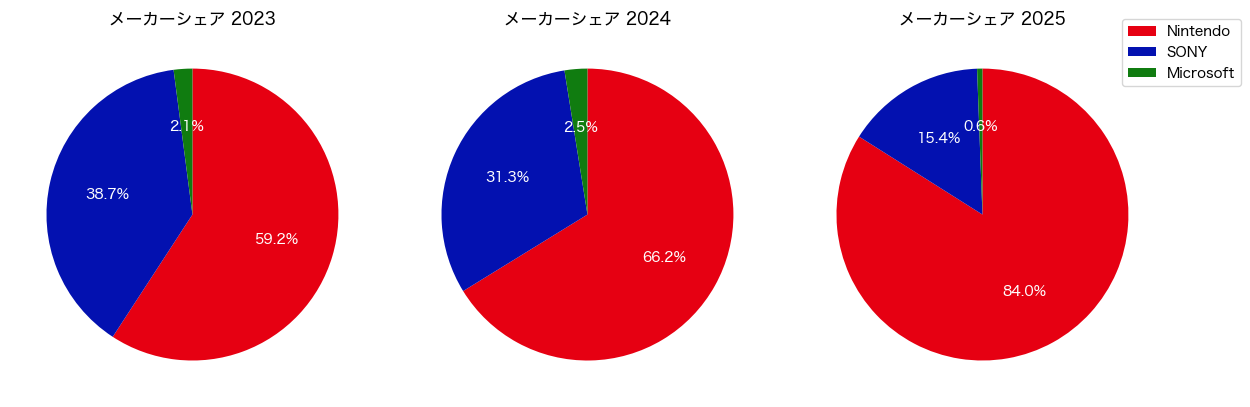

In [41]:
(fig, df) = ph.plot_maker_share_pie(begin_year=gu.years_ago(report_date, 2).year, end_year=report_date.year)